In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%%time
train_df = pd.read_csv("../../01_input/train.csv")
test_df = pd.read_csv("../../01_input/test.csv")

CPU times: user 11.6 s, sys: 508 ms, total: 12.1 s
Wall time: 16.1 s


In [3]:
submit_flg=1 #全件処理かどうかをコントロール
grid_flg=1 #GridSearchをするかコントロール
SEED=12345
sample_num=10000
fold_num=5

#train関連
train_drop_col=['ID_code','target']
train_label='target'

#test関連
test_drop_col=['ID_code']

In [4]:
#x,y作成
x_train=train_df.drop(train_drop_col,axis=1)
x_test=test_df.drop(test_drop_col,axis=1)

特徴量作成コードを記載

In [5]:
pd.set_option('display.max_columns', 500)
x_train.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.0000

In [35]:
for i in x_train.columns:
    print(i)
    print(x_train[i].nunique())

var_0
94672
var_1
108932
var_2
86555
var_3
74597
var_4
63515
var_5
141029
var_6
38599
var_7
103063
var_8
98617
var_9
49417
var_10
128764
var_11
130193
var_12
9561
var_13
115181
var_14
79122
var_15
19810
var_16
86918
var_17
137823
var_18
139515
var_19
144180
var_20
127764
var_21
140062
var_22
90660
var_23
24913
var_24
105101
var_25
14853
var_26
127089
var_27
60185
var_28
35859
var_29
88339
var_30
145977
var_31
77388
var_32
85964
var_33
112239
var_34
25164
var_35
122384
var_36
96404
var_37
79040
var_38
115366
var_39
112674
var_40
141878
var_41
131896
var_42
31592
var_43
15188
var_44
127702
var_45
169968
var_46
93450
var_47
154781
var_48
152039
var_49
140641
var_50
32308
var_51
143455
var_52
121313
var_53
33460
var_54
144776
var_55
128077
var_56
103045
var_57
35545
var_58
113907
var_59
37744
var_60
113763
var_61
159369
var_62
74777
var_63
97098
var_64
59379
var_65
108347
var_66
47722
var_67
137253
var_68
451
var_69
110346
var_70
153193
var_71
13527
var_72
110114
var_73
142582
var_74
16105

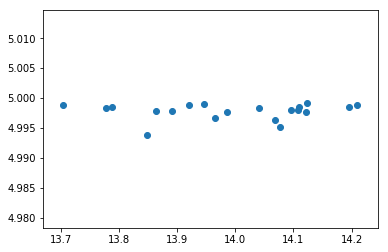

In [85]:
train_df=train_df.sort_values('var_68')
x_train_sample=train_df[0:20]
plt.scatter(x_train_sample['var_12'],x_train_sample['var_68'])
#plt.xlim(13.8,14.0)
#plt.ylim(-10,10)
plt.show()


In [78]:
train_df[train_df['var_68']<4.999]

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
151989,train_151989,0,8.0253,-3.6270,8.4976,2.0852,12.3135,-13.4724,5.0568,15.1595,5.6919,9.3991,-7.5152,-8.2971,13.8486,5.3592,5.6230,14.7936,9.0299,4.6206,24.3051,11.7089,12.4299,24.5309,4.5319,4.1387,9.0878,13.7858,0.8009,-5.0515,5.2117,4.0784,-5.1719,10.2136,-1.0086,15.1407,12.2420,3.6978,4.7473,8.6894,4.6882,0.1441,11.8411,16.8240,11.6464,11.7789,8.2105,-43.1072,12.2144,-36.7628,-0.7297,19.1941,12.2092,16.4114,-5.5966,5.9569,12.4574,12.3822,19.9828,6.2164,2.6838,7.8880,9.2304,-18.8639,0.4226,4.8038,4.6575,-10.4503,6.4357,6.9853,4.9938,-9.9729,17.2293,0.4849,-3.8641,20.7739,21.1176,22.6874,4.8686,24.8741,6.1049,17.1966,14.7088,14.2083,3.4819,15.0785,-13.1026,20.1882,22.4769,14.6543,7.1503,3.4099,-26.3640,7.0491,9.6147,11.1242,9.2221,-0.3188,0.9229,34.9423,1.9501,1.3580,0.1486,7.0145,33.0737,1.8278,13.0347,4.0620,6.8764,15.8259,14.2808,19.6898,10.9509,4.2786,4.7627,0.1489,4.5091,0.9562,0.2090,-3.6625,-1.4853,-1.7564,24.9073,10.3167,1.1977,6.6125,6.8978,12.1418,12.0429,-1.4487,-5.5632,13.0368,11.7298,1.0757,10.5321,6.5835,1.4873,-3.1028,25.1021,10.5757,-5.5886,17.4474,5.0163,-5.9545,5.9917,16.8449,9.4581,6.2180,5.7517,7.2063,3.7994,-4.6932,16.7810,10.2758,4.3578,15.1400,-1.8809,-0.6284,13.2047,-7.8540,8.5018,11.0948,28.4379,5.5331,3.7448,6.4331,-2.7091,20.5596,3.4121,-7.8907,5.7774,5.5184,4.4020,-0.4745,21.8498,-9.6984,24.0545,16.4023,9.1406,13.6935,-10.1145,1.1047,-1.4993,13.2938,13.1170,4.3827,5.6903,-0.6082,8.5922,6.6571,16.4403,0.9871,5.7215,12.3377,3.6422,10.9215,18.7794,0.3026,2.3979,8.1779,11.1377,-18.7535
29081,train_29081,0,8.5717,-1.0394,7.9596,6.3859,11.0721,-4.9264,4.7944,11.3465,-0.6609,7.8242,11.6076,-3.1413,14.0766,11.3875,9.5247,14.2308,8.0245,-6.0183,9.4707,18.4508,21.2781,21.5349,5.0184,2.8443,15.3572,13.8663,1.2345,-0.2722,4.2634,3.8588,0.3374,11.5751,4.7191,11.3852,10.9803,-2.0470,2.5192,6.5936,7.5352,-1.3803,-5.1558,5.5289,11.9289,11.4849,2.4917,-7.2953,12.8569,-20.5884,10.6532,26.5536,12.5626,18.6727,-8.5191,6.2407,-6.0588,17.1664,17.7451,6.4714,2.8690,9.1533,6.9221,-22.8835,0.0693,-4.1333,6.4863,4.8682,7.2779,18.7878,4.9951,-7.7393,7.7450,0.2256,-6.4483,13.1946,-3.9651,15.4860,14.9145,18.2368,7.9262,14.1842,2.2895,13.5160,-9.5929,-3.5853,-9.5983,19.1881,-5.0506,16.6014,8.1201,1.5695,-29.5434,7.1851,13.2757,11.1691,7.4992,-1.0494,30.2655,36.9915,2.1997,0.6660,-10.5614,9.6467,18.4390,1.6673,10.5767,2.5704,8.4985,21.6122,14.4289,25.1805,8.9180,5.4303,2.7447,10.9299,3.2452,0.8915,4.0065,-6.7260,-8.0202,-0.1171,11.4129,12.2607,1.6

In [67]:
x_train_sample['var_68']

151989    4.9938
29081     4.9951
181977    4.9964
14141     4.9967
53835     4.9976
88626     4.9977
2881      4.9978
95477     4.9979
192480    4.9980
23769     4.9980
6956      4.9983
106470    4.9984
34864     4.9985
36926     4.9985
38895     4.9985
79497     4.9988
175505    4.9988
127184    4.9989
71348     4.9990
155314    4.9992
180058    4.9992
151625    4.9993
112184    4.9995
82063     4.9996
118073    4.9996
66940     4.9996
101361    4.9997
117448    4.9997
3520      4.9998
31808     4.9998
           ...  
14372     5.0007
23255     5.0007
28595     5.0007
84683     5.0007
45822     5.0007
16117     5.0007
116516    5.0007
174337    5.0007
196681    5.0007
125516    5.0007
116742    5.0007
62838     5.0007
113390    5.0007
107393    5.0007
133458    5.0007
125311    5.0007
163317    5.0007
80204     5.0007
125382    5.0007
154605    5.0007
18614     5.0007
94345     5.0007
199789    5.0007
110835    5.0007
2080      5.0007
74166     5.0007
182177    5.0007
188799    5.00

In [18]:
x_train_sample['var_68']

0        5.0109
1        5.0220
2        5.0228
3        5.0220
4        5.0301
5        5.0110
6        5.0178
7        5.0128
8        5.0157
9        5.0257
10       5.0206
11       5.0253
12       5.0129
13       5.0265
14       5.0203
15       5.0085
16       5.0242
17       5.0241
18       5.0080
19       5.0275
20       5.0261
21       5.0280
22       5.0293
23       5.0361
24       5.0209
25       5.0275
26       5.0179
27       5.0330
28       5.0243
29       5.0202
          ...  
19970    5.0085
19971    5.0079
19972    5.0183
19973    5.0285
19974    5.0263
19975    5.0187
19976    5.0191
19977    5.0159
19978    5.0329
19979    5.0186
19980    5.0052
19981    5.0146
19982    5.0282
19983    5.0206
19984    5.0236
19985    5.0241
19986    5.0138
19987    5.0107
19988    5.0299
19989    5.0237
19990    5.0200
19991    5.0133
19992    5.0246
19993    5.0139
19994    5.0201
19995    5.0286
19996    5.0182
19997    5.0233
19998    5.0117
19999    5.0118
Name: var_68, Length: 20

In [17]:
new_feature_train.to_csv('../../02_feature/119_train_NegPosCount.csv',index=False,header=True)
new_feature_test.to_csv('../../02_feature/119_test_NegPosCount.csv',index=False,header=True)